# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane appear to be the most effective drugs in treating the tumors in mice. When looking in the Summary Statistics section, these two had the lowest mean and median tumor volume by at least 10 mm3.
- These two drugs also had the lowest variance, standard deviation, and standard error of the mean when looking at tumor volume. With less variability in the results of these drugs, we have a better idea of what the final tumor volume will be for a mouse that takes it.
- There also appears to be a strong positive correlation between the weight of a mouse and the average tumor volume for mice that took Capomulin. Therefore, we can infer that for mouse taking Capomulin, heavier mice will likely have larger average tumor volumes.

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [54]:
# Checking the number of mice.
mice_count = len(merge_df['Mouse ID'].unique())
mice_count

249

In [55]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [56]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = merge_df.loc[merge_df['Mouse ID'] == 'g989']
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [57]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.loc[merge_df['Mouse ID'] != 'g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [58]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(clean_df['Mouse ID'].unique())
clean_mice_count

248

## Summary Statistics

In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
stats = clean_df.groupby(['Drug Regimen'])
mean = stats['Tumor Volume (mm3)'].mean()
median = stats['Tumor Volume (mm3)'].median()
variance = stats['Tumor Volume (mm3)'].var()
st_dev = stats['Tumor Volume (mm3)'].std()
sem = stats['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
stat_df = pd.DataFrame(
    {'Mean Tumor Volume': mean,
     'Median Tumor Volume': median,
     'Tumor Volume Variance': variance,
     'Tumor Volume Std. Dev.': st_dev,
     'Tumor Volume Std. Err.': sem
    }
)

stat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_df = clean_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

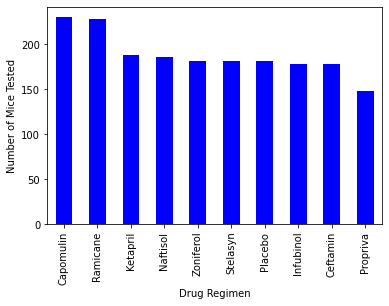

In [61]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint = clean_df['Drug Regimen'].value_counts()
bar_df = pd.DataFrame({'Timepoint': timepoint})
bar_df.plot.bar(xlabel='Drug Regimen', ylabel='Number of Mice Tested', color='blue', legend=False)
plt.show()

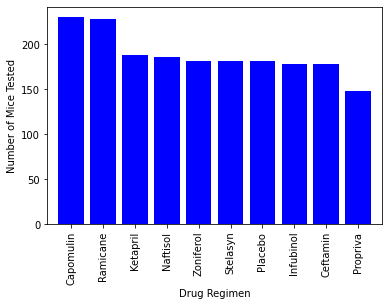

In [62]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug = clean_df['Drug Regimen'].unique()
timepoint = clean_df['Drug Regimen'].value_counts()

x_axis = np.arange(0, len(drug))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.xlim(-0.75, len(drug)-.25)

plt.bar(x_axis, timepoint, facecolor="b", align="center")
plt.xticks(tick_locations, timepoint.index, rotation=90)
plt.show()


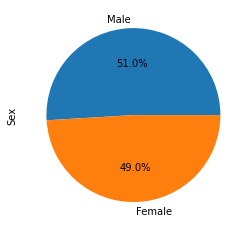

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_df['Sex'].value_counts()
pie_df = pd.DataFrame({'Sex': sex})
pie_df.plot.pie(y='Sex', legend=False, autopct='%1.1f%%')
plt.show()

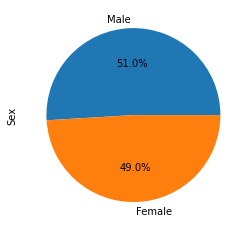

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = pie_df.index
sizes = pie_df['Sex']
plt.ylabel('Sex')
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_df.groupby('Mouse ID')['Timepoint'].max()

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_df = pd.merge(last_timepoint_df, clean_df, on=['Mouse ID', 'Timepoint'], how='left')
final_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [66]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for each in treatments_list:
    loc_df = final_df.loc[final_df['Drug Regimen'] == each,'Tumor Volume (mm3)']
    
    tumor_vol_data.append(loc_df)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol_data[treatments_list.index(each)].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The interquartile range of {each} is: {iqr}")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = loc_df.loc[(loc_df < lower_bound) | (loc_df > upper_bound)]
    
    print(f"{each} potential outliers: {outliers}")

The interquartile range of Capomulin is: 7.781863460000004
Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
The interquartile range of Ramicane is: 9.098536719999998
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
The interquartile range of Infubinol is: 11.477135160000003
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
The interquartile range of Ceftamin is: 15.577752179999997
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


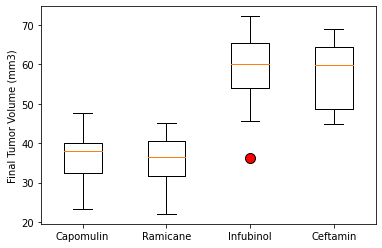

In [67]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
x_axis = np.arange(0, len(treatments_list), 1) + 1
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})
ax.set_xticks(x_axis, labels=treatments_list)
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

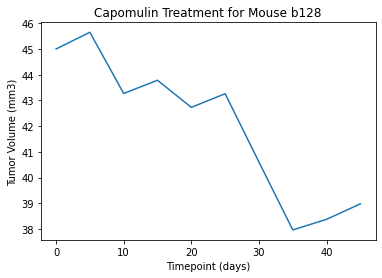

In [68]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Filter dataframe to just mice that were treated with Capomulin 
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

# Create new dataframe with a mouse found from the previous step
mouse_df = capomulin_df.loc[capomulin_df['Mouse ID'] == 'b128']

# Create line plot
mouse_x = mouse_df['Timepoint']
mouse_y = mouse_df['Tumor Volume (mm3)']
plt.plot(mouse_x, mouse_y)
plt.title('Capomulin Treatment for Mouse b128')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

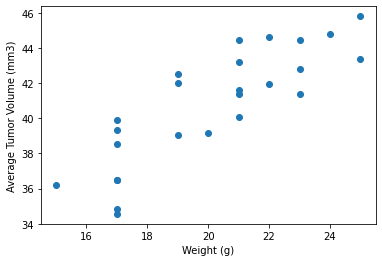

In [112]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_axis = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()
y_axis = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
plt.scatter(x_axis, y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


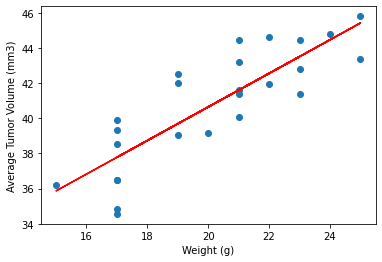

In [111]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# create linear regression
x_values = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()
y_values = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# create the equation
regress_values = x_values * slope + intercept

print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")

# create scatter
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()